El objetivo de este cuaderno es encontrar una buena función de distribución para el estadístico de Kolmogorov-Smirnov tal y como lo utilizo en mi tesois; este estadístico probablemente dependerá de los parámetro n y p de la binomial hipotéticamente subyacente, así como del número N de muestras aleatorias extraídas. 

In [3]:
import numpy as np
import scipy.stats as st
import scipy.special as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt

from myutils import *

# Análisis detallado paso a paso

## Definimos los hiperparámetros

In [10]:
N = 20//2*19
n = 100
p = 0.4838068421052632

## Generamos los datos Dks

In [11]:
Dks=[]
for t in range(10000):
    exp=np.histogram(st.binom.rvs(n=n,p=p,size=N), bins=101, range=(0,100))[0]
    exp=exp/exp.sum()
    Dks.append(max([abs(exp.cumsum()[i]-st.binom.cdf(k=i,n=n,p=p)) for i in range(n+1)]))

    if (t+1)%100==0:
        print(f"{t+1}",end='\r')

## Construimos el histograma

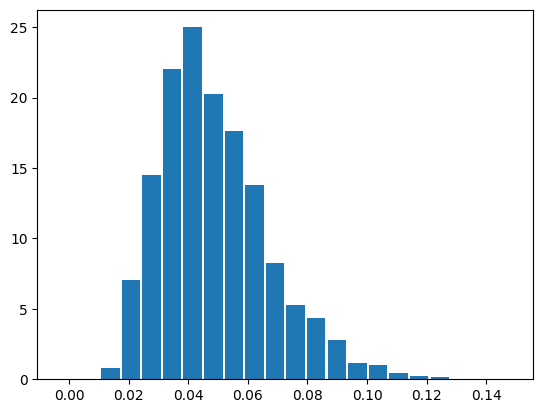

In [12]:
#print(len(get_hist_smooth(Dks,p=0.9)[0]))
hist,bins = np.histogram(Dks, density=True, bins=22, range=(0,max(Dks)))

plt.bar(bins[:-1],hist, width=0.9*(bins[1]-bins[0]))
plt.show()

## Ajustamos el histograma a una curva normal sesgada

a:	3.1914621649411776
loc:	0.027282767530071715
scale:	0.027632999759272667


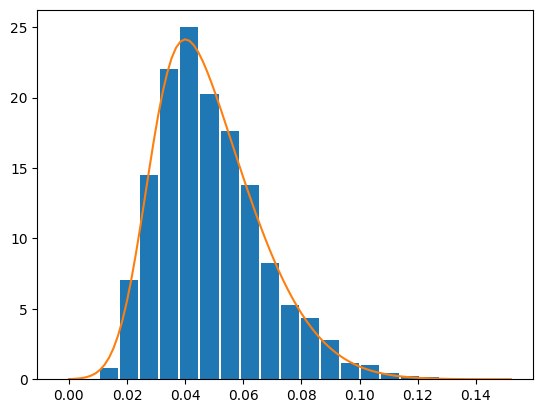

In [13]:
a,loc,scale = opt.curve_fit(st.skewnorm.pdf, xdata=bins[:-1], ydata=hist, p0=[1,1,1])[0]
print(f"a:\t{a}\nloc:\t{loc}\nscale:\t{scale}")

plt.plot(np.linspace(bins[0],bins[-1],100),st.skewnorm.pdf(np.linspace(bins[0],bins[-1],100),a=a,loc=loc,scale=scale),color='C1')
plt.bar(bins[:-1],hist, width=0.9*(bins[1]-bins[0]),color='C0')
plt.show()

## Calculamos el intervalo de confianza (-inf,conf) para las significancias típicas

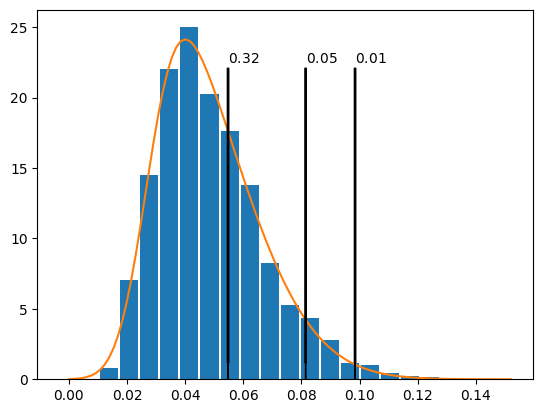

N: 190
n: 100
p: 0.4838068421052632

alpha	conf
0.32	0.05476099323147758
0.05	0.0814424518428103
0.01	0.09846065805513626
----------------------------------


In [14]:
alpha = [1-68/100, 1-95/100, 1-99/100] # Niveles de significancia típicos ("regla empírica").

def func(x,a,loc,scale,alpha):
    return st.skewnorm.cdf(x=x,a=a,loc=loc,scale=scale)-(1-alpha)

conf = [opt.root_scalar(func, args=(a,loc,scale,alpha), bracket=(bins[0],bins[-1]))['root'] for alpha in alpha]

plt.plot(np.linspace(bins[0],bins[-1],100),st.skewnorm.pdf(x=np.linspace(bins[0],bins[-1],100),a=a,loc=loc,scale=scale),color='C1')
plt.bar(bins[:-1],hist, width=0.9*(bins[1]-bins[0]),color='C0')
plt.annotate(text=f"${alpha[0]:.2f}$", xy=(conf[0],0), xytext=(conf[0],0.9*max(hist)),
             arrowprops=dict(width=1,headwidth=0))
plt.annotate(text=f"${alpha[1]:.2f}$", xy=(conf[1],0), xytext=(conf[1],0.9*max(hist)),
             arrowprops=dict(width=1,headwidth=0))
plt.annotate(text=f"${alpha[2]:.2f}$", xy=(conf[2],0), xytext=(conf[2],0.9*max(hist)),
             arrowprops=dict(width=1,headwidth=0))
plt.show()

print(f"N: {N}\nn: {n}\np: {p}\n")
print(f"alpha\tconf\n{alpha[0]:.2f}\t{conf[0]}\n{alpha[1]:.2f}\t{conf[1]}\n{alpha[2]:.2f}\t{conf[2]}\n----------------------------------")

## Calculamos el intervalo de confianza entorno a la media para las significancias típicas

In [16]:
print(st.skewnorm.interval(0.68,a=a,loc=loc,scale=scale))
print(st.skewnorm.interval(0.95,a=a,loc=loc,scale=scale))
print(st.skewnorm.interval(0.99,a=a,loc=loc,scale=scale))

(0.031043440422365204, 0.06610910366555706)
(0.019910851960974772, 0.08921944856241179)
(0.013584070708750274, 0.10484953097498631)


# Tabla de valores